# Model definition - only non-deep learning algorithm

- Choose, justify and apply a model performance indicator (e.g. F1 score, true positive rate, within cluster sum of squared error, …) to assess your model and justify the choice of an algorithm

- Implement your algorithm in at least one deep learning and at least one non-deep learning algorithm, compare and document model performance

- Apply at least one additional iteration in the process model involving at least the feature creation task and record impact on model performance (e.g. data normalizing, PCA, …)

Depending on the algorithm class and data set size you might choose specific technologies / frameworks to solve your problem. Please document all your decisions in the ADD (Architectural Decisions Document).

Once you think you have achieved a descent model performance save the notebook according to the process model’s naming convention and proceed to the model training task.

## 1. Load the dataset (train and test separately)
## 2. Model performance indicator
## 3. Logistic regression 
## 4. Random Forest Classifier
## 5. Additional iteration in the process model

### Load python moduels

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
pd.set_option("display.max_columns",101)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

/Users/hkromer/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 1. Load the dataset (train and test separately)

In [2]:
train_data = './data/train.encoded.001.csv'
test_data = './data/test.encoded.001.csv'
df_train = pd.read_csv(train_data, index_col=0)
df_test = pd.read_csv(test_data, index_col=0)

In [3]:
df_test.head()

,Age,SibSp,Parch,Fare,Num_cabins,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_letter_A,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_F E,Cabin_letter_F G,Cabin_letter_G,Cabin_letter_missing,Embarked_C,Embarked_Q,Embarked_S,Title_Col,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Ticket_letters_A,Ticket_letters_C,Ticket_letters_CA,Ticket_letters_FC,Ticket_letters_FCC,Ticket_letters_PC,Ticket_letters_PP,Ticket_letters_SC,Ticket_letters_SO,Ticket_letters_SOC,Ticket_letters_SOTON,Ticket_letters_STON,Ticket_letters_W,Ticket_letters_WEP,Ticket_letters_digits,Ticket_letters_missing,TravelGroup_Alone,TravelGroup_Duo,TravelGroup_GroupLarge,TravelGroup_GroupSmall,Embarked_missing,Title_Capt,Title_Don,Title_Jonkheer,Title_Lady,Title_Major,Title_Mlle,Title_Mme,Title_Sir,Title_the Countess,Ticket_letters_Fa,Ticket_letters_P,Ticket_letters_SCO,Ticket_letters_SOP,Ticket_letters_SP,Ticket_letters_SW,Ticket_letters_WE
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
892,34.5,0,0,7.8292,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
893,47.0,1,0,7.0000,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
894,62.0,0,0,9.6875,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
895,27.0,0,0,8.6625,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
896,22.0,1,1,12.2875,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.head()

,Survived,Age,SibSp,Parch,Fare,Num_cabins,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_letter_A,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_F E,Cabin_letter_F G,Cabin_letter_G,Cabin_letter_missing,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Ticket_letters_A,Ticket_letters_C,Ticket_letters_CA,Ticket_letters_FC,Ticket_letters_FCC,Ticket_letters_Fa,Ticket_letters_P,Ticket_letters_PC,Ticket_letters_PP,Ticket_letters_SC,Ticket_letters_SCO,Ticket_letters_SO,Ticket_letters_SOC,Ticket_letters_SOP,Ticket_letters_SOTON,Ticket_letters_SP,Ticket_letters_STON,Ticket_letters_SW,Ticket_letters_W,Ticket_letters_WE,Ticket_letters_WEP,Ticket_letters_digits,TravelGroup_Alone,TravelGroup_Duo,TravelGroup_GroupLarge,TravelGroup_GroupSmall
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,38.0,1,0,71.2833,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,26.0,0,0,7.9250,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,35.0,1,0,53.1000,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5,0,35.0,0,0,8.0500,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


## 2. Model performance indicator

F1 Score because one seeks a balance between Precision and Recall AND there is an uneven class distribution. F1 score = 2 * (precision x recall)/(precision + recall).

**precision** is true positive / (true positive + false positive)

Precision talks about how precise/accurate the model is out of those predicted positive, how many of them are actual positive.

**recall** is true positive / (true positive + false negative)

Recall calculates how many of the Actual Positives the model capture through labeling it as Positive (True Positive)

## 3. Logistic regression 

### Selection of features

In [5]:
df_train.columns.tolist()

['Survived',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Num_cabins',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Cabin_letter_A',
 'Cabin_letter_B',
 'Cabin_letter_C',
 'Cabin_letter_D',
 'Cabin_letter_E',
 'Cabin_letter_F',
 'Cabin_letter_F E',
 'Cabin_letter_F G',
 'Cabin_letter_G',
 'Cabin_letter_missing',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Embarked_missing',
 'Title_Capt',
 'Title_Col',
 'Title_Don',
 'Title_Dr',
 'Title_Jonkheer',
 'Title_Lady',
 'Title_Major',
 'Title_Master',
 'Title_Miss',
 'Title_Mlle',
 'Title_Mme',
 'Title_Mr',
 'Title_Mrs',
 'Title_Ms',
 'Title_Rev',
 'Title_Sir',
 'Title_the Countess',
 'Ticket_letters_A',
 'Ticket_letters_C',
 'Ticket_letters_CA',
 'Ticket_letters_FC',
 'Ticket_letters_FCC',
 'Ticket_letters_Fa',
 'Ticket_letters_P',
 'Ticket_letters_PC',
 'Ticket_letters_PP',
 'Ticket_letters_SC',
 'Ticket_letters_SCO',
 'Ticket_letters_SO',
 'Ticket_letters_SOC',
 'Ticket_letters_SOP',
 'Ticket_letters_SOTON',
 'Ticket_l

In [6]:
features = [
     'Age',
     'SibSp',
     'Parch',
     'Fare',
     'Num_cabins',
     'Pclass_1',
     'Pclass_2',
     'Pclass_3',
     'Sex_female',
     'Sex_male',
     'Cabin_letter_A',
     'Cabin_letter_B',
     'Cabin_letter_C',
     'Cabin_letter_D',
     'Cabin_letter_E',
     'Cabin_letter_F',
     'Cabin_letter_F E',
     'Cabin_letter_F G',
     'Cabin_letter_G',
     'Cabin_letter_missing',
     'Embarked_C',
     'Embarked_Q',
     'Embarked_S',
     'Embarked_missing',
     'Title_Capt',
     'Title_Col',
     'Title_Don',
     'Title_Dr',
     'Title_Jonkheer',
     'Title_Lady',
     'Title_Major',
     'Title_Miss',
     'Title_Mlle',
     'Title_Mme',
     'Title_Mr',
     'Title_Master',
     'Title_Mrs',
     'Title_Ms',
     'Title_Rev',
     'Title_Sir',
     'Title_the Countess',
     'Ticket_letters_A',
     'Ticket_letters_C',
     'Ticket_letters_CA',
     'Ticket_letters_FC',
     'Ticket_letters_FCC',
     'Ticket_letters_Fa',
     'Ticket_letters_P',
     'Ticket_letters_PC',
     'Ticket_letters_PP',
     'Ticket_letters_SC',
     'Ticket_letters_SCO',
     'Ticket_letters_SO',
     'Ticket_letters_SOC',
     'Ticket_letters_SOP',
     'Ticket_letters_SOTON',
     'Ticket_letters_SP',
     'Ticket_letters_STON',
     'Ticket_letters_SW',
     'Ticket_letters_W',
     'Ticket_letters_WE',
     'Ticket_letters_WEP',
     'Ticket_letters_digits',
     'TravelGroup_Alone',
     'TravelGroup_Duo',
     'TravelGroup_GroupLarge',
     'TravelGroup_GroupSmall'    
]
X = df_train[features]
X.head()

,Age,SibSp,Parch,Fare,Num_cabins,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_letter_A,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_F E,Cabin_letter_F G,Cabin_letter_G,Cabin_letter_missing,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Master,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Ticket_letters_A,Ticket_letters_C,Ticket_letters_CA,Ticket_letters_FC,Ticket_letters_FCC,Ticket_letters_Fa,Ticket_letters_P,Ticket_letters_PC,Ticket_letters_PP,Ticket_letters_SC,Ticket_letters_SCO,Ticket_letters_SO,Ticket_letters_SOC,Ticket_letters_SOP,Ticket_letters_SOTON,Ticket_letters_SP,Ticket_letters_STON,Ticket_letters_SW,Ticket_letters_W,Ticket_letters_WE,Ticket_letters_WEP,Ticket_letters_digits,TravelGroup_Alone,TravelGroup_Duo,TravelGroup_GroupLarge,TravelGroup_GroupSmall
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22.0,1,0,7.2500,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38.0,1,0,71.2833,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,26.0,0,0,7.9250,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,35.0,1,0,53.1000,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5,35.0,0,0,8.0500,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


### Select the target variable Survived and create train test split

In [7]:
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
lr = LogisticRegression().fit(X_train, y_train)  # standard parameters

In [9]:
lr_predicted = lr.predict(X_test)

In [10]:
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, lr_predicted)))
print('Precision: {:.4f}'.format(precision_score(y_test, lr_predicted)))
print('Recall: {:.4f}'.format(recall_score(y_test, lr_predicted)))
print('F1: {:.4f}'.format(f1_score(y_test, lr_predicted)))

Accuracy: 0.8296
Precision: 0.7614
Recall: 0.7976
F1: 0.7791


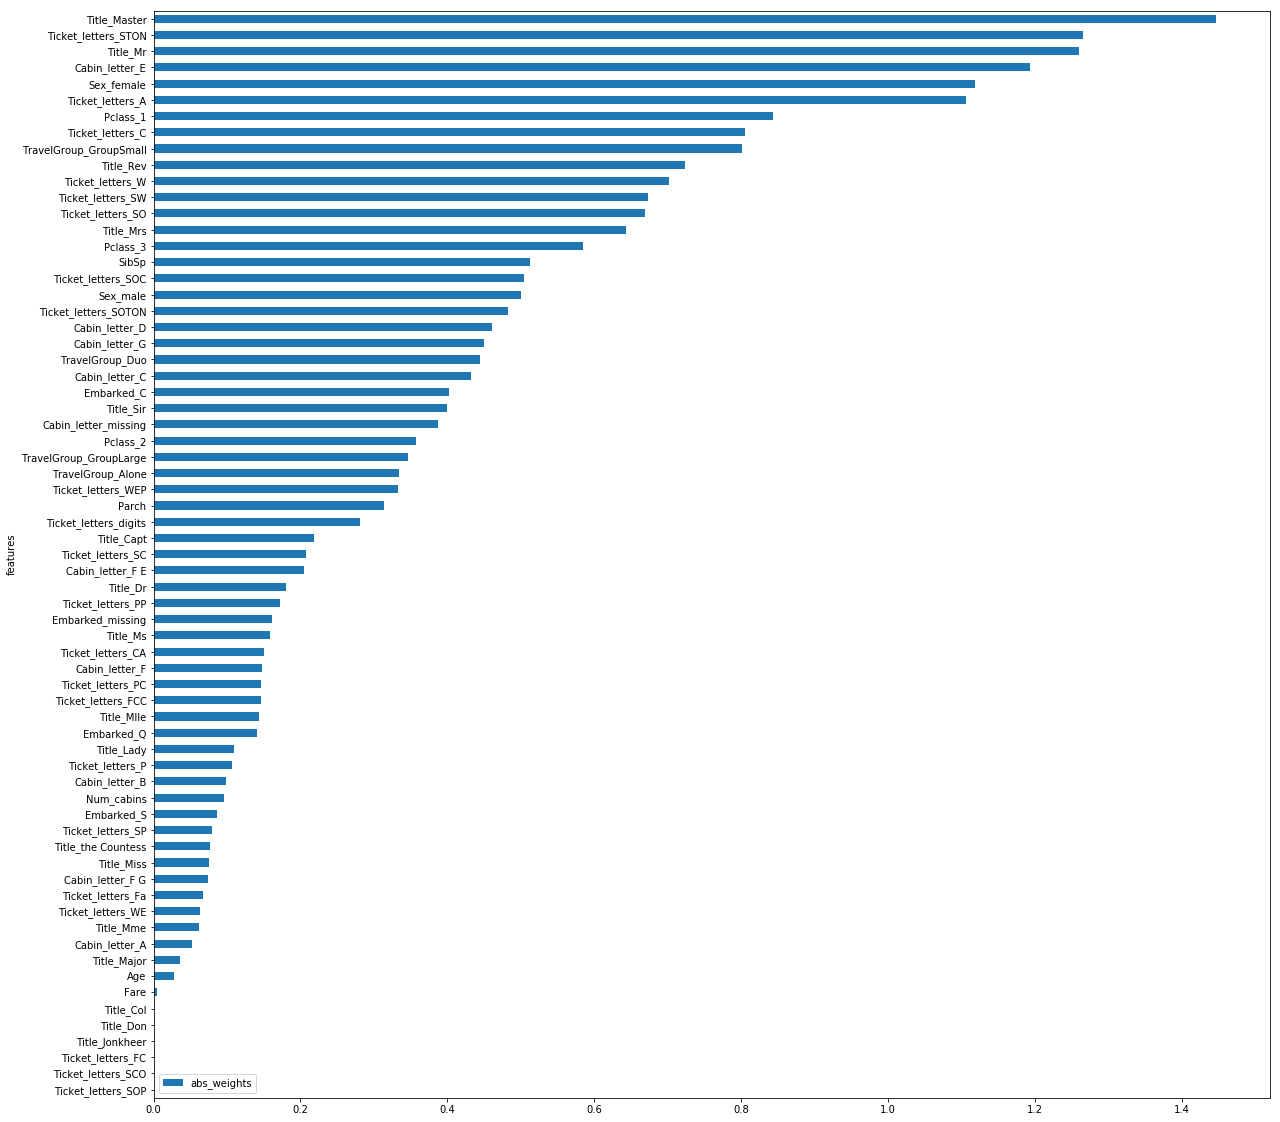

In [11]:
#get weights and get the magnitude
weights = lr.coef_[0]
abs_weights = np.abs(weights)

df_feat_importances = pd.DataFrame()
df_feat_importances['features'] = features
# df_feat_importances['weights'] = weights
df_feat_importances['abs_weights'] = abs_weights
df_feat_importances.set_index('features', inplace=True)
df_feat_importances.sort_values(by=['abs_weights'], inplace=True)
df_feat_importances.plot(kind='barh', figsize=(20, 20))

## 4. Random Forest Classifier
Tree-based estimators can assess feature importances, that can be used to get rid of unimportant features.

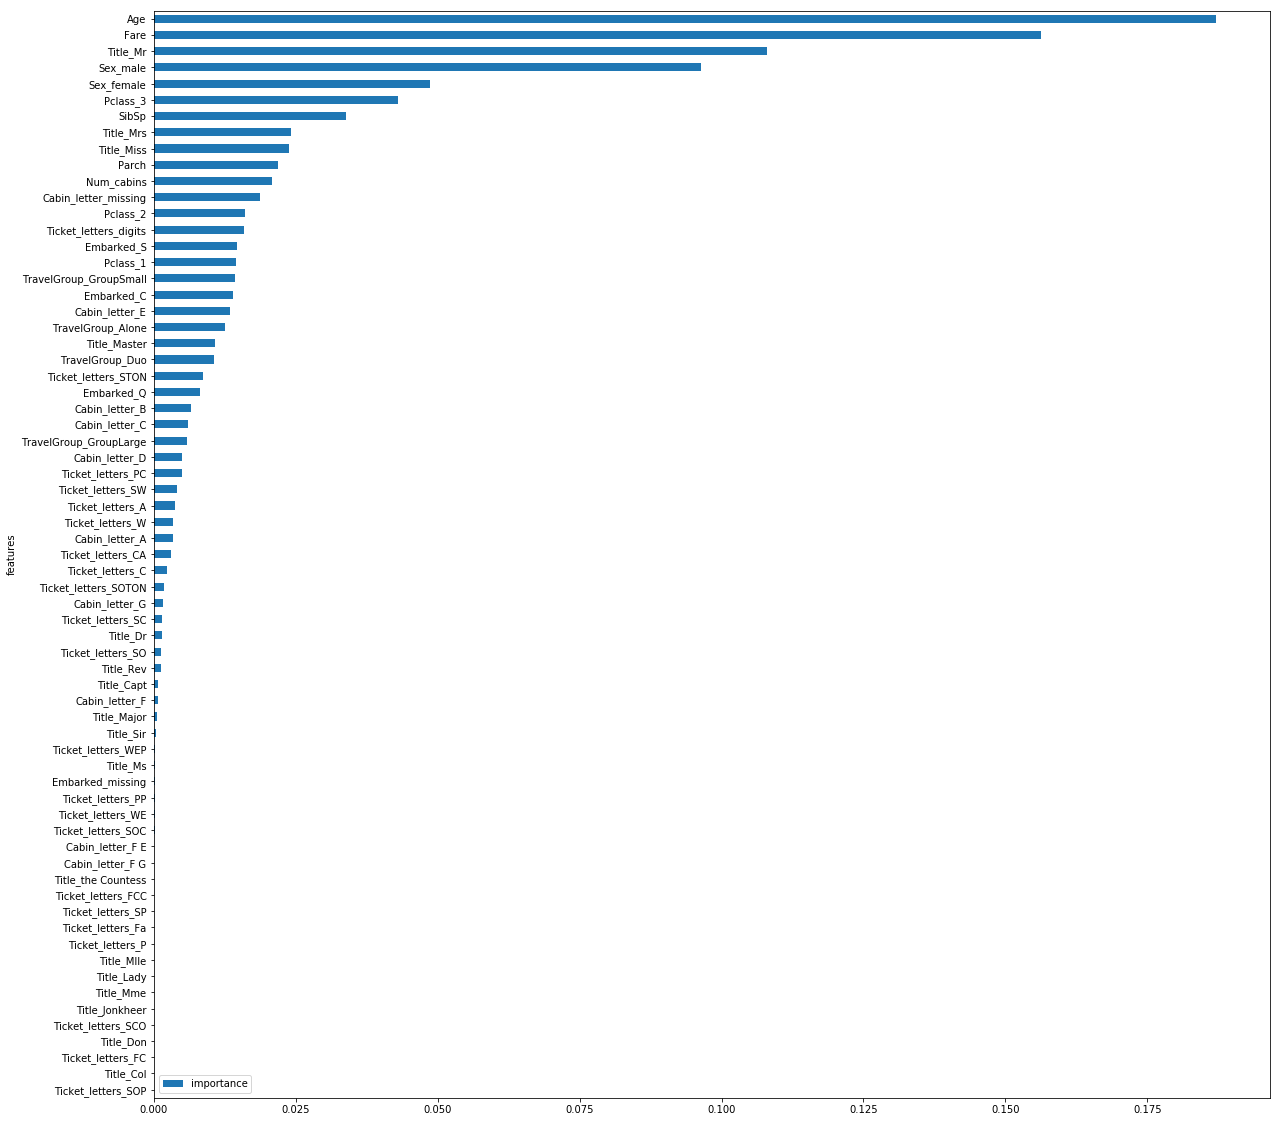

In [12]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt') # Empirical good default values are max_features=sqrt(n_features) for classification tasks
clf = clf.fit(X_train, y_train)
clf_predicted = clf.predict(X_test)
df_feat_importances = pd.DataFrame()
df_feat_importances['features'] = features
df_feat_importances['importance'] = clf.feature_importances_
df_feat_importances.sort_values(by=['importance'], ascending=True, inplace=True)
df_feat_importances.set_index('features', inplace=True)
df_feat_importances.plot(kind='barh', figsize=(20, 20))


In [13]:
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, clf_predicted)))
print('Precision: {:.4f}'.format(precision_score(y_test, clf_predicted)))
print('Recall: {:.4f}'.format(recall_score(y_test, clf_predicted)))
print('F1: {:.4f}'.format(f1_score(y_test, clf_predicted)))

Accuracy: 0.8386
Precision: 0.8077
Recall: 0.7500
F1: 0.7778


In [14]:
features = [
     'Age',
     'SibSp',
     'Parch',
     'Fare',
     'Num_cabins',
     'Pclass_1',
     'Pclass_2',
     'Pclass_3',
     'Sex_female',
     'Sex_male',
     'Cabin_letter_A',
     'Cabin_letter_B',
     'Cabin_letter_C',
     'Cabin_letter_D',
     'Cabin_letter_E',
     'Cabin_letter_F',
     'Cabin_letter_F E',
     'Cabin_letter_F G',
     'Cabin_letter_G',
     'Cabin_letter_missing',
     'Embarked_C',
     'Embarked_Q',
     'Embarked_S',
     'Embarked_missing',
     'Title_Capt',
     'Title_Col',
     'Title_Don',
     'Title_Dr',
     'Title_Jonkheer',
     'Title_Lady',
     'Title_Major',
     'Title_Miss',
     'Title_Mlle',
     'Title_Mme',
     'Title_Mr',
     'Title_Master',
     'Title_Mrs',
     'Title_Ms',
     'Title_Rev',
     'Title_Sir',
     'Title_the Countess',
     'Ticket_letters_A',
     'Ticket_letters_C',
     'Ticket_letters_CA',
     'Ticket_letters_FC',
     'Ticket_letters_FCC',
     'Ticket_letters_Fa',
     'Ticket_letters_P',
     'Ticket_letters_PC',
     'Ticket_letters_PP',
     'Ticket_letters_SC',
     'Ticket_letters_SCO',
     'Ticket_letters_SO',
     'Ticket_letters_SOC',
     'Ticket_letters_SOP',
     'Ticket_letters_SOTON',
     'Ticket_letters_SP',
     'Ticket_letters_STON',
     'Ticket_letters_SW',
     'Ticket_letters_W',
     'Ticket_letters_WE',
     'Ticket_letters_WEP',
     'Ticket_letters_digits',
     'TravelGroup_Alone',
     'TravelGroup_Duo',
     'TravelGroup_GroupLarge',
     'TravelGroup_GroupSmall'    
]

## 5. Additional iteration in the process model

In [28]:
def model_clf(features, df_train, n_estimators, plot=1):
    print(f'*** Number of features: {len(features)} ***')
    print(f'n_estimators: {n_estimators}')
    X = df_train[features]
    y = df_train['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    clf = RandomForestClassifier(n_estimators=n_estimators, max_features='sqrt') # Empirical good default values are max_features=sqrt(n_features) for classification tasks
    clf = clf.fit(X_train, y_train)
    clf_predicted = clf.predict(X_test)
    df_feat_importances = pd.DataFrame()
    df_feat_importances['features'] = features
    df_feat_importances['importance'] = clf.feature_importances_
    df_feat_importances.sort_values(by=['importance'], ascending=True, inplace=True)
    df_feat_importances.set_index('features', inplace=True)
    
    print('Accuracy: {:.4f}'.format(accuracy_score(y_test, clf_predicted)))
    print('Precision: {:.4f}'.format(precision_score(y_test, clf_predicted)))
    print('Recall: {:.4f}'.format(recall_score(y_test, clf_predicted)))
    print('F1: {:.4f}'.format(f1_score(y_test, clf_predicted)))
    imp_feat = df_feat_importances.iloc[-6:,:]
    if plot == 1:
        imp_feat.plot(kind='barh', figsize=(10, 5))
    print('\n')
    

In [29]:
# only the essential features
features_essential = [     
    'Age',
     'SibSp',
     'Parch',
     'Fare',
     'Pclass_1',
     'Pclass_2',
     'Pclass_3',
     'Sex_female',
     'Sex_male'
]

# no travelgroup features
features_no_travelgroup = [
     'Age',
     'SibSp',
     'Parch',
     'Fare',
     'Num_cabins',
     'Pclass_1',
     'Pclass_2',
     'Pclass_3',
     'Sex_female',
     'Sex_male',
     'Cabin_letter_A',
     'Cabin_letter_B',
     'Cabin_letter_C',
     'Cabin_letter_D',
     'Cabin_letter_E',
     'Cabin_letter_F',
     'Cabin_letter_F E',
     'Cabin_letter_F G',
     'Cabin_letter_G',
     'Cabin_letter_missing',
     'Embarked_C',
     'Embarked_Q',
     'Embarked_S',
     'Embarked_missing',
     'Title_Capt',
     'Title_Col',
     'Title_Don',
     'Title_Dr',
     'Title_Jonkheer',
     'Title_Lady',
     'Title_Major',
     'Title_Miss',
     'Title_Mlle',
     'Title_Mme',
     'Title_Mr',
     'Title_Master',
     'Title_Mrs',
     'Title_Ms',
     'Title_Rev',
     'Title_Sir',
     'Title_the Countess',
     'Ticket_letters_A',
     'Ticket_letters_C',
     'Ticket_letters_CA',
     'Ticket_letters_FC',
     'Ticket_letters_FCC',
     'Ticket_letters_Fa',
     'Ticket_letters_P',
     'Ticket_letters_PC',
     'Ticket_letters_PP',
     'Ticket_letters_SC',
     'Ticket_letters_SCO',
     'Ticket_letters_SO',
     'Ticket_letters_SOC',
     'Ticket_letters_SOP',
     'Ticket_letters_SOTON',
     'Ticket_letters_SP',
     'Ticket_letters_STON',
     'Ticket_letters_SW',
     'Ticket_letters_W',
     'Ticket_letters_WE',
     'Ticket_letters_WEP',
     'Ticket_letters_digits'  
]
# all features
features_all = [
     'Age',
     'SibSp',
     'Parch',
     'Fare',
     'Num_cabins',
     'Pclass_1',
     'Pclass_2',
     'Pclass_3',
     'Sex_female',
     'Sex_male',
     'Cabin_letter_A',
     'Cabin_letter_B',
     'Cabin_letter_C',
     'Cabin_letter_D',
     'Cabin_letter_E',
     'Cabin_letter_F',
     'Cabin_letter_F E',
     'Cabin_letter_F G',
     'Cabin_letter_G',
     'Cabin_letter_missing',
     'Embarked_C',
     'Embarked_Q',
     'Embarked_S',
     'Embarked_missing',
     'Title_Capt',
     'Title_Col',
     'Title_Don',
     'Title_Dr',
     'Title_Jonkheer',
     'Title_Lady',
     'Title_Major',
     'Title_Miss',
     'Title_Mlle',
     'Title_Mme',
     'Title_Mr',
     'Title_Master',
     'Title_Mrs',
     'Title_Ms',
     'Title_Rev',
     'Title_Sir',
     'Title_the Countess',
     'Ticket_letters_A',
     'Ticket_letters_C',
     'Ticket_letters_CA',
     'Ticket_letters_FC',
     'Ticket_letters_FCC',
     'Ticket_letters_Fa',
     'Ticket_letters_P',
     'Ticket_letters_PC',
     'Ticket_letters_PP',
     'Ticket_letters_SC',
     'Ticket_letters_SCO',
     'Ticket_letters_SO',
     'Ticket_letters_SOC',
     'Ticket_letters_SOP',
     'Ticket_letters_SOTON',
     'Ticket_letters_SP',
     'Ticket_letters_STON',
     'Ticket_letters_SW',
     'Ticket_letters_W',
     'Ticket_letters_WE',
     'Ticket_letters_WEP',
     'Ticket_letters_digits',
     'TravelGroup_Alone',
     'TravelGroup_Duo',
     'TravelGroup_GroupLarge',
     'TravelGroup_GroupSmall'    
]

*** Number of features: 9 ***
n_estimators: 30
Accuracy: 0.8341
Precision: 0.8310
Recall: 0.7024
F1: 0.7613


*** Number of features: 9 ***
n_estimators: 50
Accuracy: 0.8117
Precision: 0.7838
Recall: 0.6905
F1: 0.7342


*** Number of features: 9 ***
n_estimators: 80
Accuracy: 0.8251
Precision: 0.8082
Recall: 0.7024
F1: 0.7516




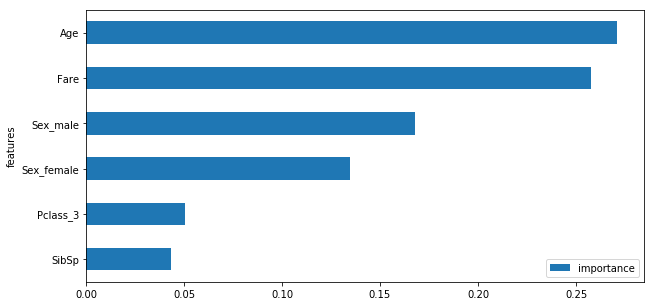

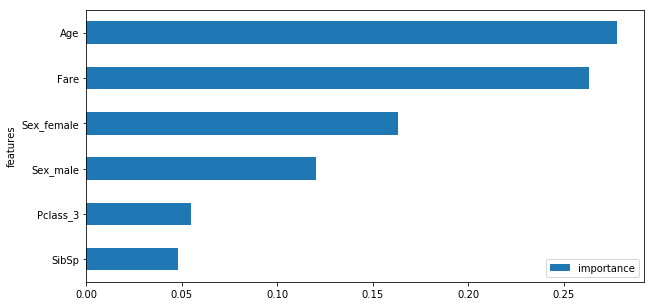

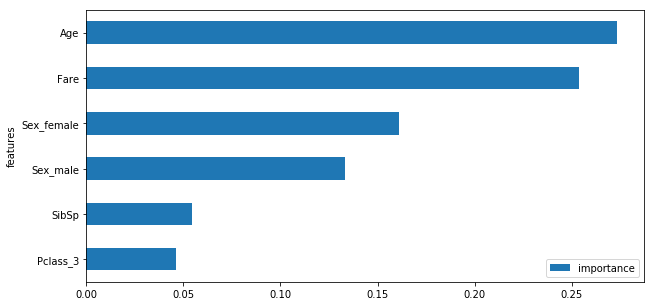

In [30]:
n_estimators = [30, 50, 80]
for n in n_estimators:
    model_clf(features_essential, df_train, n)

*** Number of features: 67 ***
n_estimators: 30
Accuracy: 0.8386
Precision: 0.8000
Recall: 0.7619
F1: 0.7805


*** Number of features: 67 ***
n_estimators: 50
Accuracy: 0.8251
Precision: 0.7848
Recall: 0.7381
F1: 0.7607


*** Number of features: 67 ***
n_estimators: 80
Accuracy: 0.8341
Precision: 0.7831
Recall: 0.7738
F1: 0.7784




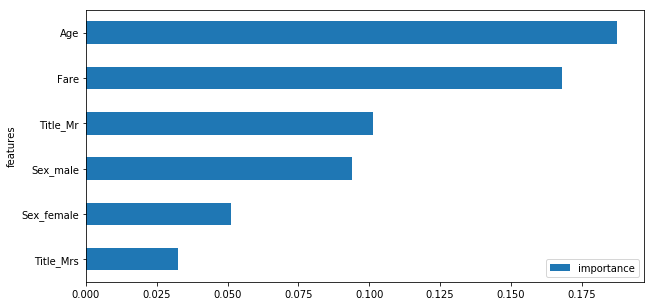

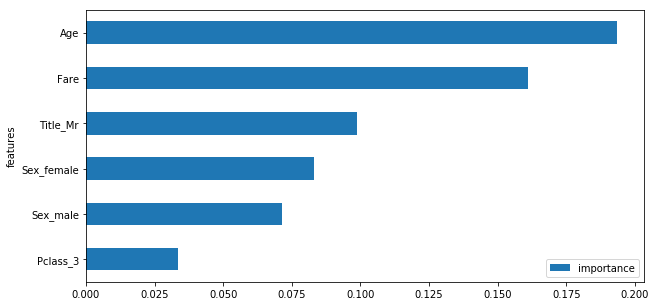

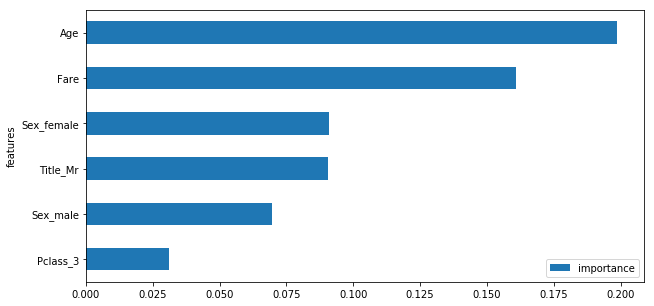

In [31]:
n_estimators = [30, 50, 80]
for n in n_estimators:
    model_clf(features_all, df_train, n)

*** Number of features: 63 ***
n_estimators: 30
Accuracy: 0.8341
Precision: 0.7831
Recall: 0.7738
F1: 0.7784


*** Number of features: 63 ***
n_estimators: 50
Accuracy: 0.8341
Precision: 0.7901
Recall: 0.7619
F1: 0.7758


*** Number of features: 63 ***
n_estimators: 80
Accuracy: 0.8386
Precision: 0.8077
Recall: 0.7500
F1: 0.7778




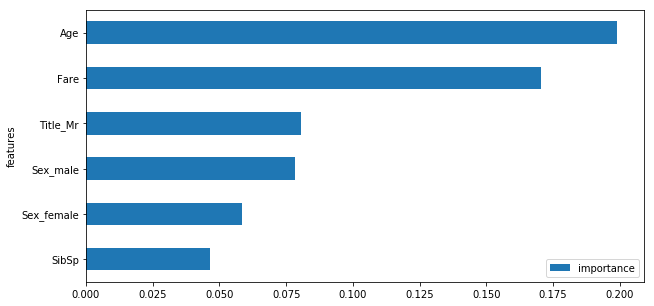

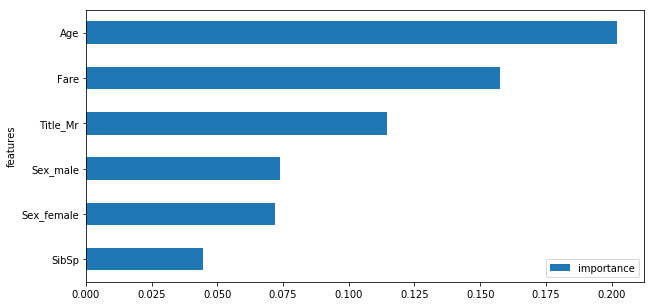

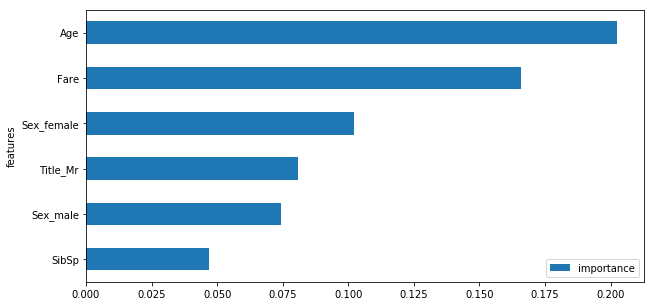

In [32]:
n_estimators = [30, 50, 80]
for n in n_estimators:
    model_clf(features_no_travelgroup, df_train, n)

Seems using all features and 50 estimators for the random forest performs best F1 score wise!

### Adding a MinMaxScaler

In [35]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def model_clf_scaled(features, df_train, n_estimators, plot=1):
    print(f'*** Number of features: {len(features)} ***')
    print(f'n_estimators: {n_estimators}')
    X = df_train[features]
    y = df_train['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf = RandomForestClassifier(n_estimators=n_estimators, max_features='sqrt') # Empirical good default values are max_features=sqrt(n_features) for classification tasks
    clf = clf.fit(X_train_scaled, y_train)
    clf_predicted = clf.predict(X_test_scaled)
    df_feat_importances = pd.DataFrame()
    df_feat_importances['features'] = features
    df_feat_importances['importance'] = clf.feature_importances_
    df_feat_importances.sort_values(by=['importance'], ascending=True, inplace=True)
    df_feat_importances.set_index('features', inplace=True)
    
    print('Accuracy: {:.4f}'.format(accuracy_score(y_test, clf_predicted)))
    print('Precision: {:.4f}'.format(precision_score(y_test, clf_predicted)))
    print('Recall: {:.4f}'.format(recall_score(y_test, clf_predicted)))
    print('F1: {:.4f}'.format(f1_score(y_test, clf_predicted)))
    imp_feat = df_feat_importances.iloc[-6:,:]
    if plot == 1:
        imp_feat.plot(kind='barh', figsize=(10, 5))
    print('\n')
    

In [38]:
print('Best SCALED')
n_estimators = [80]
for n in n_estimators:
    model_clf_scaled(features_all, df_train, n, plot=0)
    
print('Best NOT SCALED')
n_estimators = [50]
for n in n_estimators:
    model_clf(features_all, df_train, n, plot=0)

Best SCALED
*** Number of features: 67 ***
n_estimators: 80
Accuracy: 0.8206
Precision: 0.7973
Recall: 0.7024
F1: 0.7468


Best NOT SCALED
*** Number of features: 67 ***
n_estimators: 50
Accuracy: 0.8161
Precision: 0.7792
Recall: 0.7143
F1: 0.7453




One can continue to do cross validation, hyperparameter tuning (i.e. with GridSearchCV), but for now this is not done here…